# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sb
import requests

In [2]:
# Dataframe exploration function
def EdaDataFrame(df):
    print('-----------------------------------------')
    print('--------------INFO----------------------')
    print('-----------------------------------------')
    try:
        print(df.info())
    except:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("some error at pandas.info() occurred")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print('-----------------------------------------')
    print('--------------NUNIQUE----------------------')
    print('-----------------------------------------')
    try:
        print(df.nunique())
    except: 
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("some error at pandas.nunique() occurred")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    
    print('-----------------------------------------')
    print('--------------DESCRIBE-----------------')
    print('-----------------------------------------')
    try:
        display(df.describe())
    except:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("some error at pandas.describe() occurred")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print('-----------------------------------------')
    print('--------------HEAD----------------------')
    print('-----------------------------------------')
    try:
        display(df[:5])
    except:
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
        print("some error at print head occurred")
        print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print('-----------------------------------------')
    print('-----------------------------------------')


# Table of Contents

- [Data Gathering](#datagathering)
- [Assessing Data](#assessingdata)
    - [Quality Issues](#Qualy)
    - [Tidiness Issues](#Tidy)
- [Cleaning Data](#cleaningdata)
- [Storing Data](#storingdata)
- [Analyzing and Visualizing Data](#AlzVizdata)



## Data Gathering
<a id='datagathering'></a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.


### 1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
EdaDataFrame(df1)

-----------------------------------------
--------------INFO----------------------
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper   

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


-----------------------------------------
--------------HEAD----------------------
-----------------------------------------


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


-----------------------------------------
-----------------------------------------


### 2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file = 'image-predictions.tsv'
response = requests.get(url)
open(file,'wb').write(response.content);

In [6]:
df2 = pd.read_csv('image-predictions.tsv',sep='\t')

In [7]:
EdaDataFrame(df2)

-----------------------------------------
--------------INFO----------------------
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None
-----------------------------------------
--------------NUNIQUE----------------------
-----------------------------------------
tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


-----------------------------------------
--------------HEAD----------------------
-----------------------------------------


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


-----------------------------------------
-----------------------------------------


### 3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)


*Not able to get Tweeter API access*

In [8]:
df3 = pd.read_json("tweet-json.json", lines=True)

In [9]:
EdaDataFrame(df3)

-----------------------------------------
--------------INFO----------------------
-----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user     

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


-----------------------------------------
--------------HEAD----------------------
-----------------------------------------


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


-----------------------------------------
-----------------------------------------


<a id='assessingdata'></a>

## Assessing Data


In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<a id='Qualy'></a>

### Quality issues
1. Wrong Data types: (df1)


|Column | type |
| ----- | ----- |
| tweet_id | int64 |
| in_reply_to_status_id | float64 |
| in_reply_to_user_id | float64 |
| timestamp| object |
| retweeted_status_id |float64|
| retweeted_status_user_id | float64 |
| retweeted_status_timestamp| object | 


2. Rows with "Stage of Dogs" with more than one classification

3. Dog names column as 'None' (string) istead of Nan (null object) for missing Data

4. Retweets rows

5. In reply rows 

6. Error getting the rate numbers like 5 instead 13.5, 75 instead 9.75, etc

7. Tweets with "This is a ---" geting Dog name as "a" 

8. Not necessary Columns (df1)
        - source
        - in_reply_to_status_id	
        - in_reply_to_user_id
        - retweeted_status_id          
        - retweeted_status_user_id     
        - retweeted_status_timestamp   

9. Remove unnecessary columns 'doggo', 'floofer',  'pupper', 'puppo',  'stg_count'

10.  Filling missing values and set tweet_id to string



### Tidiness issues

1. Text Column with text and pictures URL (df1)

2. Stage of dogs in colums (df1)

2. Tweets are present at the three data sets. 

<a id='cleaningdata'></a>

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [10]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

In [11]:
df1_clean.info();
df2_clean.info();
df3_clean.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<a id='genissue'></a>

### General Issue

In [12]:
# Check is all df3(json file) is in df1
df3.id.isin(df1.tweet_id).sum()

df3_clean.rename(columns={'id':'tweet_id'},inplace=True)

### Merge the two dataframes df1 and df2 into one and clean 

In [13]:
df4_clean = pd.merge(df1_clean, df2_clean, on="tweet_id", how="outer", validate="one_to_one")

df4_clean = pd.merge(df4_clean,df3_clean[['tweet_id','retweet_count','favorite_count']], on="tweet_id",how='outer',validate="one_to_one")


In [14]:
df3_clean[['tweet_id','retweet_count','favorite_count']]

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [15]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

<a id='Issue1'></a>
       
### Issue #1:
Wrong Data types:


|Column | type |
| ----- | ----- |
| in_reply_to_status_id | float64 |
| in_reply_to_user_id | float64 |
| timestamp| object |
| retweeted_status_id |float64|
| retweeted_status_user_id | float64 |
| retweeted_status_timestamp| object | 



#### Define:
Change Column type:

- in_reply_to_status_id	to int
- in_reply_to_user_id	to int 
- timestamp	to datatime 
- retweeted_status_id	to int
- retweeted_status_user_id	to int
- retweeted_status_timestamp	to datatime


#### Code

In [16]:
df4_clean.in_reply_to_status_id = df4_clean.in_reply_to_status_id.astype('Int64')
df4_clean.in_reply_to_user_id = df4_clean.in_reply_to_user_id.astype('Int64')
df4_clean.timestamp = df4_clean.timestamp.astype('datetime64[ns]')
df4_clean.retweeted_status_id = df4_clean.retweeted_status_id.astype('Int64')
df4_clean.retweeted_status_user_id = df4_clean.retweeted_status_user_id.astype('Int64')
df4_clean.retweeted_status_timestamp = df4_clean.retweeted_status_timestamp.astype('datetime64[ns]')

#### Test

In [17]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null Int64
in_reply_to_user_id           78 non-null Int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null Int64
retweeted_status_user_id      181 non-null Int64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                 


<a id='Issue2'></a>
       
### Issue #2:

Rows with "Stage of Dogs" with more than one classification

#### Define

Select rows with more than 1 dog stage classification, if more than 1 delete entry.

#### Code

In [18]:
df4_clean['stg_count'] = (df4_clean.doggo!='None').astype(int)+(df4_clean.floofer!='None').astype(int)+(df4_clean.pupper!='None').astype(int)+(df4_clean.puppo!='None').astype(int) 

mask_stg = (df4_clean.stg_count>1)


In [19]:
(df4_clean.stg_count>1).sum()

14

In [20]:
df4_clean = df4_clean.drop(df4_clean[mask_stg].index,axis=0)
df4_clean = df4_clean.reset_index()

In [21]:
df4_clean['stg_count'] = (df4_clean.doggo!='None').astype(int)+(df4_clean.floofer!='None').astype(int)+(df4_clean.pupper!='None').astype(int)+(df4_clean.puppo!='None').astype(int) 
(df4_clean.stg_count>1).sum()

0

In [22]:
df4_clean.doggo=df4_clean.doggo.replace(r'None',np.nan, regex=True)
df4_clean.floofer=df4_clean.floofer.replace(r'None',np.nan , regex=True)
df4_clean.pupper=df4_clean.pupper.replace(r'None', np.nan, regex=True)
df4_clean.puppo=df4_clean.puppo.replace(r'None', np.nan, regex=True)

#### Test

In [23]:
print(df4_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
index                         2342 non-null int64
tweet_id                      2342 non-null int64
in_reply_to_status_id         77 non-null Int64
in_reply_to_user_id           77 non-null Int64
timestamp                     2342 non-null datetime64[ns]
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           179 non-null Int64
retweeted_status_user_id      179 non-null Int64
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          2342 non-null object
doggo                         83 non-null object
floofer                       9 non-null object
pupper                        245 non-null object
puppo                         2

<a id='Issue3'></a>

### Issue #3:

Missing Data at Dog names column as 'None' (string) istead of None (null object)

#### Define

Select rows with more than 1 dog stage classification, if more than 1 delete entry.

In [24]:
df4_clean.name=df4_clean.name.str.replace(r'None', '', regex=True)
df4_clean.name=df4_clean.name.replace(r'^\s*$', np.nan, regex=True)

#### Test

In [25]:
print(df4_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
index                         2342 non-null int64
tweet_id                      2342 non-null int64
in_reply_to_status_id         77 non-null Int64
in_reply_to_user_id           77 non-null Int64
timestamp                     2342 non-null datetime64[ns]
source                        2342 non-null object
text                          2342 non-null object
retweeted_status_id           179 non-null Int64
retweeted_status_user_id      179 non-null Int64
retweeted_status_timestamp    179 non-null datetime64[ns]
expanded_urls                 2283 non-null object
rating_numerator              2342 non-null int64
rating_denominator            2342 non-null int64
name                          1605 non-null object
doggo                         83 non-null object
floofer                       9 non-null object
pupper                        245 non-null object
puppo                         2

### Issue #4:

Retwites rows


#### Define
Mask not empty "retweeted_status_id" column and Drop Rows

#### Code

In [26]:
df4_clean = df4_clean[df4_clean.retweeted_status_id.isnull()]
df4_clean  = df4_clean.reset_index(drop=True)

#### Test

In [27]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 32 columns):
index                         2163 non-null int64
tweet_id                      2163 non-null int64
in_reply_to_status_id         77 non-null Int64
in_reply_to_user_id           77 non-null Int64
timestamp                     2163 non-null datetime64[ns]
source                        2163 non-null object
text                          2163 non-null object
retweeted_status_id           0 non-null Int64
retweeted_status_user_id      0 non-null Int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2105 non-null object
rating_numerator              2163 non-null int64
rating_denominator            2163 non-null int64
name                          1490 non-null object
doggo                         75 non-null object
floofer                       9 non-null object
pupper                        224 non-null object
puppo                         24 non-

### Issue #5:

Mask not empty "In reply rows" column and Drop Rows

#### Define
Mask not empty "rin_reply_to_status_id" column and Drop Rows

#### Code


In [28]:
df4_clean = df4_clean[df4_clean.in_reply_to_status_id.isnull()]


In [29]:
df4_clean  = df4_clean.reset_index(drop=True)

#### Test

In [30]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 32 columns):
index                         2086 non-null int64
tweet_id                      2086 non-null int64
in_reply_to_status_id         0 non-null Int64
in_reply_to_user_id           0 non-null Int64
timestamp                     2086 non-null datetime64[ns]
source                        2086 non-null object
text                          2086 non-null object
retweeted_status_id           0 non-null Int64
retweeted_status_user_id      0 non-null Int64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2083 non-null object
rating_numerator              2086 non-null int64
rating_denominator            2086 non-null int64
name                          1489 non-null object
doggo                         72 non-null object
floofer                       9 non-null object
pupper                        221 non-null object
puppo                         23 non-nu

### Issue #6:

6. Error geting the numbers like 5 intead 13.5


#### Define

Select rows and round values.

13.5 --> 13  

9.75 --> 10 

11.27-->11 

11.26-->11 



#### Code

In [31]:
pd.options.display.max_colwidth =150
print(df4_clean.loc[df1_clean.rating_denominator<1,['text','rating_numerator']])

                                                                                                                                                      text  \
313  This is Scooter. His lack of opposable thumbs is rendering his resistance to tickling embarrassingly moot. 12/10 would keep tickling https://t.co/...   

     rating_numerator  
313                12  


In [32]:
df4_clean[df4_clean['text'].str.contains(r'\d+\.\d+\/', case=True, regex=True)]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stg_count
41,45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaT,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407.0,46860.0,0
523,695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaT,...,True,Persian_cat,0.122978,False,chow,0.102654,True,7069.0,20296.0,0
579,763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,NaN,NaN,NaT,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885.0,7320.0,1
1463,1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaT,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542.0,1879.0,0


In [33]:
df4_clean.loc[41,'rating_numerator'] = 13
df4_clean.loc[523,'rating_numerator'] = 10
df4_clean.loc[579,'rating_numerator'] = 11
df4_clean.loc[1463,'rating_numerator'] = 11


#### Test

In [34]:
df4_clean[df4_clean['text'].str.contains(r'\d+\.\d+\/', case=True, regex=True)]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stg_count
41,45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaT,...,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True,10407.0,46860.0,0
523,695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaT,...,True,Persian_cat,0.122978,False,chow,0.102654,True,7069.0,20296.0,0
579,763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://...,NaN,NaN,NaT,...,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,1885.0,7320.0,1
1463,1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaT,...,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,542.0,1879.0,0


#### Define
Mask not empty "rin_reply_to_status_id" column and Drop Rows

#### Code


### Issue #7:
Tweets with "This is a ---" geting Dog name as "a" 


#### Define
Mask rows witn with name column entry equal 'a' and change for NaN

#### Code


In [35]:
df4_clean.loc[df4_clean.name=='a','name']=np.NaN

#### Test


In [36]:
(df4_clean.name=='a').sum()

0

### Issue #8:

Not necessary Columns:

source
in_reply_to_status_id
in_reply_to_user_id
retweeted_status_id
retweeted_status_user_id
retweeted_status_timestamp


#### Define

Drop the columns:

source

in_reply_to_status_id 

in_reply_to_user_id 

retweeted_status_id 

retweeted_status_user_id 

retweeted_status_timestamp 


#### Code

In [37]:
df4_clean.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',\
                'retweeted_status_timestamp'],axis=1,inplace=True)

#### Test

In [38]:
print(df4_clean.columns)

Index(['index', 'tweet_id', 'timestamp', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog',
       'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count', 'stg_count'],
      dtype='object')


<a id='tidy'></a>

## Tidiness issues

### Issue #1 
Text Column with text and URL



#### Define

1 - At DataSet 1 create new column twt_url

2 - Extract from DataSet 1 text column the url, and copy to colugn twt_url



#### Code 

In [39]:
df4_clean['twt_url'] = df4_clean.text.str.extract(r'(https.*)')
df4_clean['text'] = df4_clean['text'].str.replace(r'(https.*)','')

#### Test

In [40]:
df4_clean.head()

,index,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stg_count,twt_url
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,...,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,0,https://t.co/MgUWQ76dJU
1,1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,...,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,0,https://t.co/0Xxu71qeIV
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,...,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,0,https://t.co/wUnZnhtVJB
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,...,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,0,https://t.co/tD36da7qLQ
4,4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,0,https://t.co/AtUZn91f7f


### Issue #2 
Stage of dogs in columns


#### Define

1- Create column dog_stage. 

2- Copy Dog from individual colugn to dog_stage column leaving missing values as Nan.

3- Remove individual dog stage column.



#### Code 

In [41]:
# Tidiness issue
df4_clean['dog_stage'] = df4_clean.doggo.fillna('')+ df4_clean.floofer.fillna('') + df4_clean.pupper.fillna('') +df4_clean.puppo.fillna('')

df4_clean.dog_stage=df4_clean.dog_stage.replace(r'^\s*$', np.nan, regex=True)


#### Test

In [42]:
df4_clean.head()

,index,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stg_count,twt_url,dog_stage
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,...,0.085851,False,banana,0.076110,False,8853.0,39467.0,0,https://t.co/MgUWQ76dJU,NaN
1,1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,...,0.090647,True,papillon,0.068957,True,6514.0,33819.0,0,https://t.co/0Xxu71qeIV,NaN
2,2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,...,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,0,https://t.co/wUnZnhtVJB,NaN
3,3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,...,0.168086,True,spatula,0.040836,False,8964.0,42908.0,0,https://t.co/tD36da7qLQ,NaN
4,4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,0,https://t.co/AtUZn91f7f,NaN


### Clean Issue #9
Remove unnecessary columns 'doggo', 'floofer',  'pupper', 'puppo',  'stg_count'

#### define

Drop columns: 'doggo', 'floofer',  'pupper', 'puppo',  'stg_count'

#### code

In [43]:
df4_clean.drop(['index','doggo', 'floofer',  'pupper', 'puppo',  'stg_count'],axis='columns', inplace=True)


#### test

In [44]:
print(df4_clean.columns)

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'twt_url', 'dog_stage'],
      dtype='object')


### Clean Issue #10
Filling  missing values set tweet_id to string

In [45]:
df4_clean.tweet_id = df4_clean.tweet_id.astype(str)

In [46]:
df4_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
text                  2086 non-null object
expanded_urls         2083 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  1434 non-null object
jpg_url               1961 non-null object
img_num               1961 non-null float64
p1                    1961 non-null object
p1_conf               1961 non-null float64
p1_dog                1961 non-null object
p2                    1961 non-null object
p2_conf               1961 non-null float64
p2_dog                1961 non-null object
p3                    1961 non-null object
p3_conf               1961 non-null float64
p3_dog                1961 non-null object
retweet_count         2086 non-null float64
favorite_count        2086 non-null float64
twt_url              

In [47]:
df4_clean.isna().sum()

tweet_id                 0
timestamp                0
text                     0
expanded_urls            3
rating_numerator         0
rating_denominator       0
name                   652
jpg_url                125
img_num                125
p1                     125
p1_conf                125
p1_dog                 125
p2                     125
p2_conf                125
p2_dog                 125
p3                     125
p3_conf                125
p3_dog                 125
retweet_count            0
favorite_count           0
twt_url                  3
dog_stage             1761
dtype: int64

#### define

Fill all missing values with 'Unkown'

#### code

In [62]:
df4_clean_master = df4_clean.fillna('Unknown')

#### test

In [63]:
df4_clean_master.isna().sum()

tweet_id              0
timestamp             0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
jpg_url               0
img_num               0
p1                    0
p1_conf               0
p1_dog                0
p2                    0
p2_conf               0
p2_dog                0
p3                    0
p3_conf               0
p3_dog                0
retweet_count         0
favorite_count        0
twt_url               0
dog_stage             0
dtype: int64

<a id='storingdata'></a>

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [64]:
df4_clean_master.to_csv("twitter_archive_master.csv", index=False)

In [51]:
df4_clean_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086 entries, 0 to 2085
Data columns (total 22 columns):
tweet_id              2086 non-null object
timestamp             2086 non-null datetime64[ns]
text                  2086 non-null object
expanded_urls         2086 non-null object
rating_numerator      2086 non-null int64
rating_denominator    2086 non-null int64
name                  2086 non-null object
jpg_url               2086 non-null object
img_num               2086 non-null object
p1                    2086 non-null object
p1_conf               2086 non-null object
p1_dog                2086 non-null object
p2                    2086 non-null object
p2_conf               2086 non-null object
p2_dog                2086 non-null object
p3                    2086 non-null object
p3_conf               2086 non-null object
p3_dog                2086 non-null object
retweet_count         2086 non-null float64
favorite_count        2086 non-null float64
twt_url               208

<a id='AlzVizdata'></a>

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [52]:
print ('Dog Stage Nan ratio:', df4_clean.dog_stage.isna().sum()/df4_clean.dog_stage.size)
print ('Dog Names Nan ratio:', df4_clean.name.isna().sum()/df4_clean.name.size)

Dog Stage Nan ratio: 0.8441994247363375
Dog Names Nan ratio: 0.31255992329817833


In [53]:
df4_clean_master.rating_numerator.describe()

count    2086.000000
mean       12.151965
std        40.444893
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Filtering outliers at the rating_numerator column

In [54]:
df4_clean_sub = df4_clean_master[df4_clean_master.rating_numerator<20]

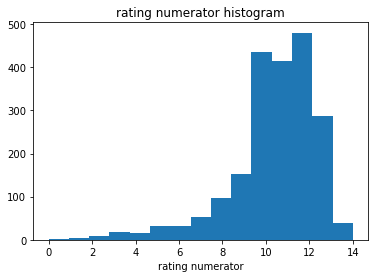

In [55]:
plt.hist(df4_clean_sub.rating_numerator,bins=15);
plt.title('rating numerator histogram')
plt.xlabel('rating numerator')
plt.savefig("./image/histogram01.png")

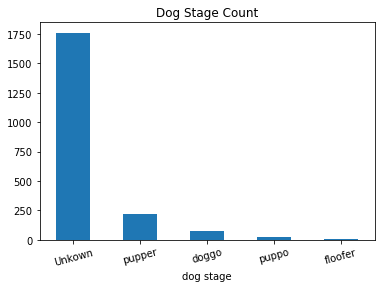

In [56]:
df4_clean_master['dog_stage'].value_counts().plot(kind='bar');
plt.xticks(rotation=15);
plt.title('Dog Stage Count')
plt.xlabel('dog stage')
plt.savefig("./image/histogram02.png")

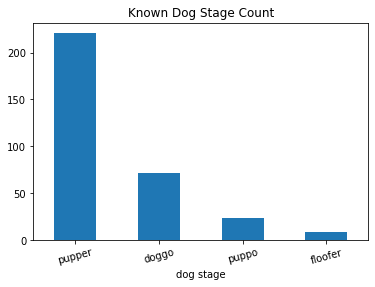

In [57]:
df4_clean['dog_stage'].value_counts().plot(kind='bar');
plt.xticks(rotation=15);
plt.title('Known Dog Stage Count')
plt.xlabel('dog stage')
plt.savefig("./image/histogram02_2.png")

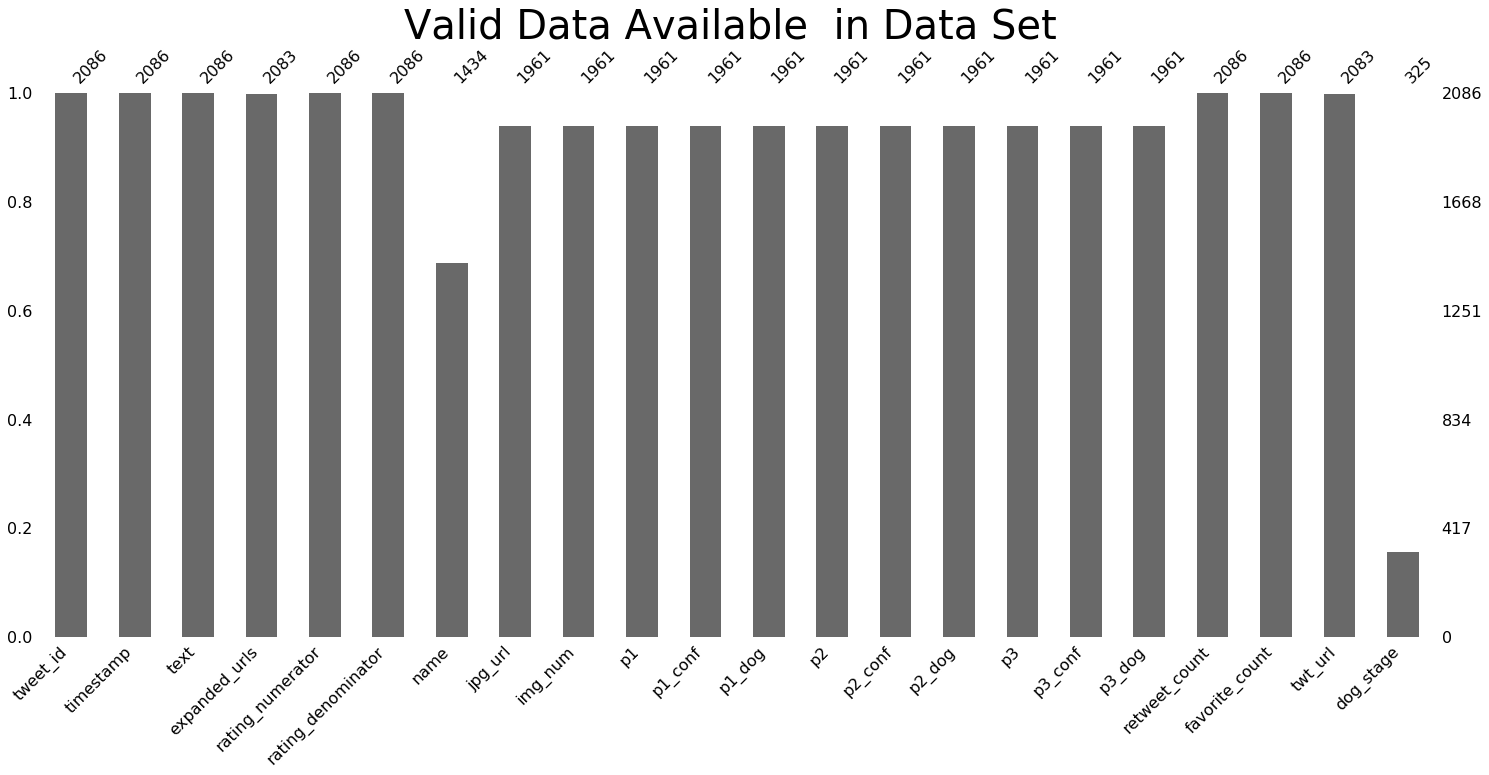

In [58]:
msno.bar(df4_clean);
plt.title('Valid Data Available  in Data Set ',fontsize=40);

plt.savefig("./image/histogram02_1.png",dpi=300, bbox_inches = "tight");

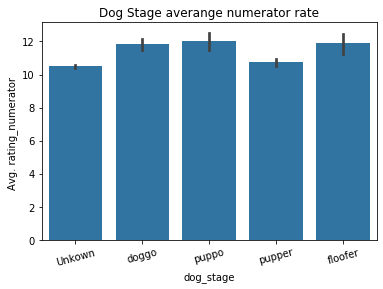

In [59]:
base_color = sb.color_palette()[0]
sb.barplot(data=df4_clean_sub, x='dog_stage', y='rating_numerator', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. rating_numerator ');
plt.title('Dog Stage averange numerator rate')
plt.savefig("./image/histogram03.jpg",bbox_inches = "tight")


### Insights:

1. Dog Stage and Dog Name columns are sparce.  

Dog Stage Nan ratio: 0.8441994247363375

Dog Names Nan ratio: 0.31255992329817833

2. For the known dog stages the most common is the pupper followed by doggo, puppo and floofer.

3. Puppers dog has the less numerator rating averange.

### Visualization

Visualizing cleaned dataframe sparsity 

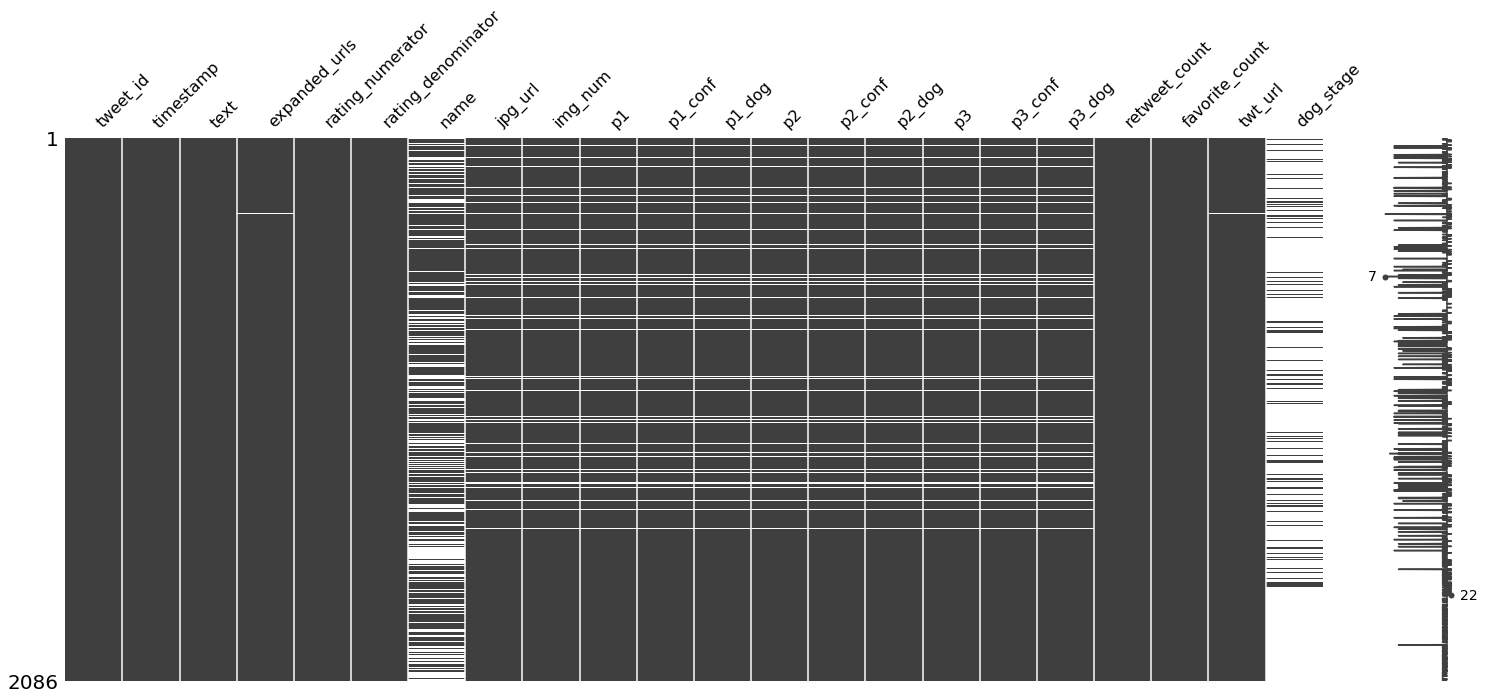

In [60]:
msno.matrix(df4_clean);
plt.savefig("./image/msno_01_test.png",dpi=800, bbox_inches = "tight")

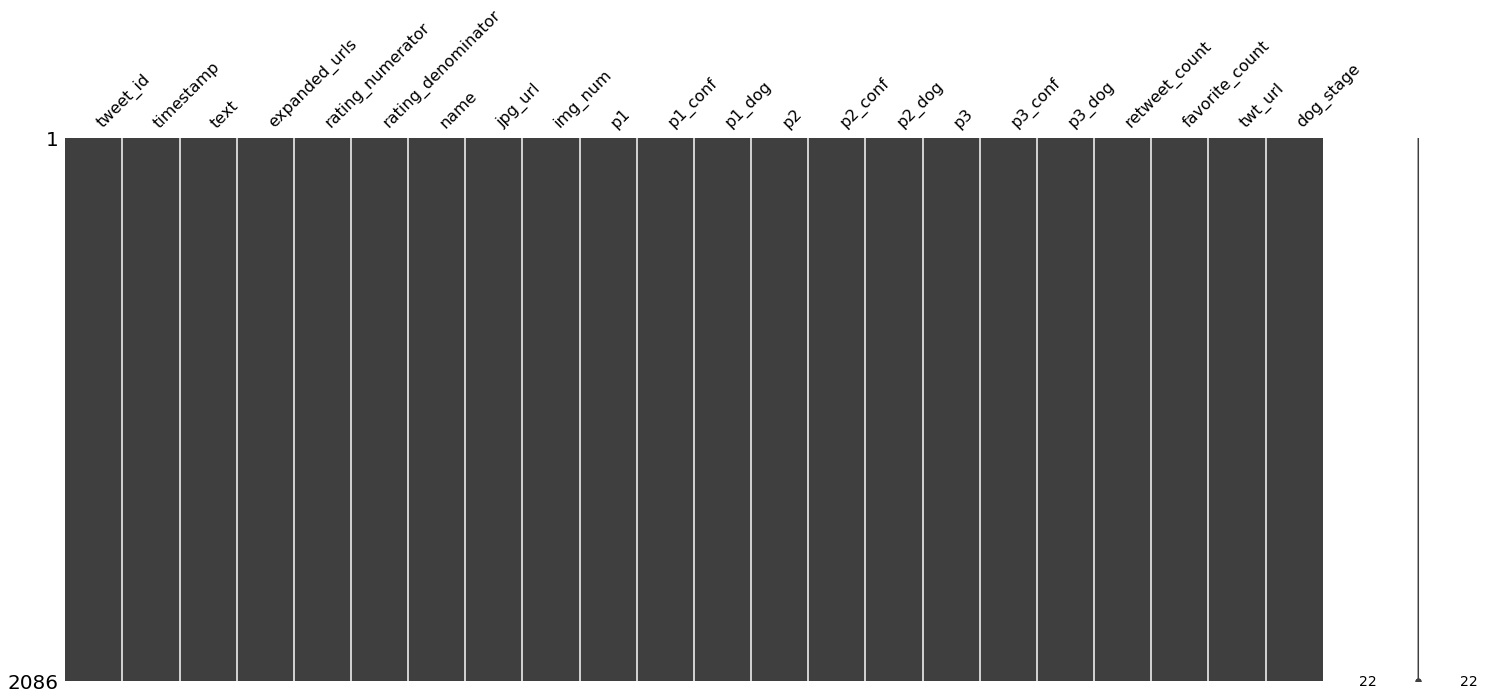

In [61]:
msno.matrix(df4_clean_master);
plt.savefig("./image/msno_02.png")